#Trabalho 7: Treinamento de uma RNA feedforward MLP com uma camada escondida

**Projetar uma rede neural feedforward com uma camada escondida para modelar os dados disponíveis no arquivo "Trabalho6dados.xlsx"**

**1- Separar os dados em conjuntos de treinamento, validação e teste;**
**2- Utilizar backpropagation por Levenberg-Marquardt para treinar os pesos da RNA;**
**3- Utilizar o Early Stopping como critério de parada para evitar overtraining;**
**4- Utilizar coeficiente de determinação ou coeficiente de correlação para avaliar ooverfitting.**

**Apresentar gráficos relativos ao MSE de treinamento, validação (early stopping) e teste e os coeficientes de determinação ou correlação para todos os dados e para os dados de teste.**
**Apresentar os resultados para a melhor rede, mas também para outras redes com diferentes números de neurônios na camada escondida.**

## Generalização


> Uma rede neural generaliza bem, quando o mapeamento de entrada/saida computado pela rede é correto (ou quase) para dados que não foram usado para a criação ou treinamento da rede. [1]

Em sintese, a generalização refere-se à capacidade de um modelo de se comportar bem em dados não vistos ou novos, ou seja, sua habilidade de realizar previsões precisas em situações além das que foram usadas para treiná-lo. Um modelo generalizado é capaz de capturar padrões subjacentes nos dados de treinamento e aplicá-los de maneira eficaz a dados desconhecidos.

Seja um conjunto de dados $D(x,y)$ proveniente de $y=f(x)+v$, $y\in \mathbb{R}^{c}$, $x\in \mathbb{R}^{m}$ e $v=[\begin{matrix}
 v_1& v_2 & ... & v_3
\end{matrix}]^{T}$, $v_i \in N(O,V)$, o modelo com capacidade de generalização é o modelo:

$$\hat{y}=h(x)\cong f(x)$$

Assim, o processo de aprendizado/treinamento pode ser visto como um problema de "ajuste de curva". Esse ponto de vista permite que interpretemos a generalização não como uma propiedade misteriosa das redes neurais e sim como o efeito de uma boa interpolação não linear dos dados de entrada.





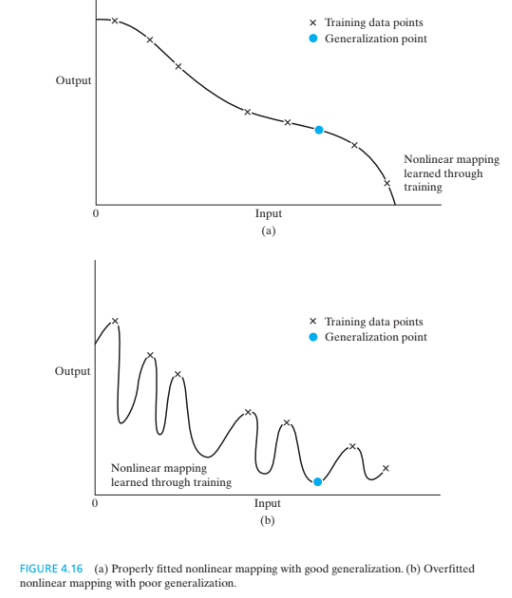
Fonte: [1]

A generalização é influênciada por três fatores:


1.  O tamanho das amostras de treinamento e o quão representativa elas são
2.  A arquitetura da rede neural
3.  A complexidade física do problema em questão

No que tange o tamanho das amostras ($N$), é nescessário que ele satisfaça a condição
$$N = O(\frac{W}{\varepsilon})$$

Onde:
- $W$: Número total de parâmetros (weights e bias) na rede
- $\varepsilon$: Fração de erros de classificação permitido nos dados de teste
- O(.): notação assintótica de ordem grande, que é usada para descrever o comportamento assintótico de uma função em relação a outra.

 Isso significa que, à medida que o número de parâmetros na rede (que inclui pesos e bias) aumenta, a quantidade de dados de treinamento necessários também aumenta para garantir uma boa generalização.

 Se $\varepsilon$ for pequeno, ou seja, se permitirmos apenas um pequeno erro de classificação nos dados de teste, será necessário um maior número de amostras de treinamento $N$ para treinar a rede de maneira adequada e garantir que ela generalize bem para novos dados.


Uma rede neural desenhada para generalizar bem, produzirá o *output* correto mesmo quando a entrada divergir sutilmente daquelas utilizadas no treinamento. Entretanto, quando uma rede neural "aprende" através de muitos exemplos de entrada/saída, ela pode acabar "memorizando" os dados de treinamento.






# *Overtraining*

O *overtraining*, também conhecido como *overfitting*, é um problema comum em redes neurais feedforward e em outras técnicas de aprendizado de máquina. Isso ocorre quando o modelo se ajusta aos dados de treinamento, memorizando-os em vez de aprender padrões que podem generalizar bem para dados não vistos, como os dados de teste. especificar mais a rede apenas para aquele dado

> Fenomeno através do qual uma rede perde a habilidade de generalizar padrões similiares de entrada e saída [1]

Seja um conjunto de dados $D(x,y)$ proveniente de $y=f(x)+v$, $y\in \mathbb{R}^{c}$, $x\in \mathbb{R}^{m}$ e $v=[\begin{matrix}
 v_1& v_2 & ... & v_3
\end{matrix}]^{T}$; $v_i \in N(O,V)$ representando os ruídos nos dados, o modelo com sobreajuste é o modelo que “aprende” não apenas a função $f(x)$ desejada, mas também o ruído $v$, ou seja:

  $$\hat{y}=h(x)\cong f(x)+v$$

O modelo se torna excessivamente complexo e ajusta não apenas o sinal nos dados, mas também os detalhes irrelevantes e o ruído. Assim, usar muitas épocas de treinamento, pode levar o modelo a ajustar o ruído nos dados de treinamento em vez de aprender os padrões significativos.

Para evitar o *overtraining*, é crucial implementar técnicas como o *Early Stopping*, que interrompe o treinamento quando não há mais melhoria significativa no desempenho do modelo no conjunto de validação, ou considerar mudanças na estrutura da rede para simplificar o modelo, caso necessário.

# Evitando *Overtraining*

Geralmente, uma rede treinada através de back-propagation aprende em etapas durante a sessão de treinamento, indo de funções de mapeamento mais simples para mais complexas. Esse processo fica evidente ao tomarmos o histórico da função de custo (MSE) em função do número de épocas de treinamento. Ele parte de um valor alto e cai rapidamente, até começar a diminuir lentamente enquanto a rede caminha para um mínimo local na superfície de erro.[1]

Caso a sessão de treinamento não pare no ponto certo, podemos verificar o sobreajute. Das técnicas para reduzir o tamanho de cada dimensão de parâmetro são a regularização, como weight decay ou dropout, ou a Parada Precoce (*Early Stopping*). A parada precoce é amplamente usada porque é simples de entender e implementar e foi relatada como sendo superior aos métodos de regularização em muitos casos.

## 1. *Early Stopping*

O *Early Stopping* (“Parada Antecipada” ou “Parada Precoce”) serve exatamente para tentar definir manualmente o "ponto certo". Isso significa que no final de cada época, devemos calcular a precisão da classificação nos dados de validação. Quando a precisão parar de melhorar, terminamos o treinamento.

 Além disso, a Parada Antecipada também impede automaticamente o overfitting. Isto é, obviamente, uma coisa boa, embora nos estágios iniciais da experimentação possa ser útil desligar a Parada Antecipada, para que você possa ver quaisquer sinais de overfitting e usá-los para definir sua abordagem de regularização.



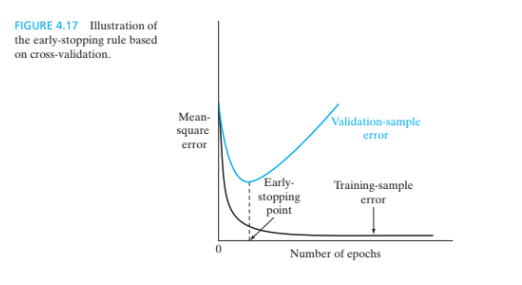 Fonte:[1]

## 2. Brute-force Pruning

O Brute-force Pruning é uma técnica que envolve a tentativa e erro de diferentes configurações de rede neural, removendo neurônios ou camadas desnecessárias. Após treinar uma rede neural, você pode avaliar o desempenho do modelo ao remover um neurônio ou uma camada por vez e observar como isso afeta a precisão nos dados de validação. Ao fazer isso repetidamente para diferentes partes da rede, é possível determinar quais partes contribuem significativamente para a precisão do modelo. A eliminação das partes menos importantes pode ajudar a reduzir a complexidade do modelo, evitando assim o overfitting.

## 3. Sensitivity Calculation

A Sensitivity Calculation envolve avaliar a sensibilidade da rede neural às pequenas mudanças nos dados de entrada. Um modelo sobreajustado geralmente é excessivamente sensível a variações mínimas nos dados de treinamento, enquanto um modelo bem generalizado é mais robusto a essas flutuações. Ao calcular a sensibilidade do modelo em relação aos dados de treinamento e validação, você pode identificar se o modelo está se ajustando demais aos dados de treinamento ou se está conseguindo generalizar eficazmente para novos dados.

## 4. k-fold Cross-validation ($D_{tr}$ e $D_{va}$)
A técnica de k-fold Cross-Validation envolve dividir o conjunto de dados em k partes iguais. O modelo é treinado em k-1 partes e validado na parte restante. Esse processo é repetido k vezes, garantindo que o modelo seja treinado e validado em diferentes subconjuntos de dados. Isso ajuda a avaliar o desempenho médio do modelo em diferentes conjuntos de dados de treinamento e validação, fornecendo uma estimativa mais robusta do desempenho do modelo.


## 5. Leave-out Cross-validation

A Leave-out Cross-Validation é uma variação da k-fold Cross-Validation, onde um único exemplo de dados é mantido como conjunto de teste, enquanto todos os outros exemplos são usados para treinamento. Esse processo é repetido para cada exemplo no conjunto de dados, garantindo que cada exemplo seja usado como conjunto de teste uma vez. Isso fornece uma avaliação abrangente do desempenho do modelo para diferentes pontos de dados, ajudando a identificar se o modelo está se ajustando excessivamente aos dados de treinamento ou se está generalizando bem para novos dados.

Essas técnicas, quando usadas em conjunto ou separadamente, ajudam a evitar o overfitting, melhorando a capacidade de generalização do modelo e tornando-o mais eficaz na previsão de novos dados.

# Métodos para quantificar generalização

## 1. Coeficiente de Determinação ($R^2$):

O coeficiente de determinação, frequentemente chamado de R², é uma métrica que quantifica a proporção da variância na variável de saída que é explicada pelo modelo.

R² varia de 0 a 1, onde 0 indica que o modelo não explica nenhuma variação nos dados de saída, e 1 indica que o modelo explica toda a variação nos dados de saída.

Em relação ao overfitting, um R² muito próximo de 1 no conjunto de treinamento pode ser um sinal de overfitting. Isso ocorre quando o modelo se ajusta tão bem aos dados de treinamento que se torna incapaz de generalizar para novos dados, resultando em um R² mais baixo no conjunto de teste

## 2. Coeficiente de Correlação de Pearson($r$):

O coeficiente de correlação de Pearson, representado por $r$, mede a relação linear entre duas variáveis, geralmente a variável de entrada e a variável de saída. O valor de $r$ varia de -1 a 1, onde -1 indica uma correlação negativa perfeita (quando uma variável aumenta, a outra tende a diminuir), 1 indica uma correlação positiva perfeita (quando uma variável aumenta, a outra tende a aumentar também) e 0 indica ausência de correlação linear. Um valor significativamente menor de  $r$ nos dados de teste em comparação aos dados de treinamento pode indicar overfitting, sugerindo que o modelo está superajustando-se aos dados de treinamento e não generalizando bem para novos dados.

## 3.  k-fold Cross-validation + medida de generalização ($D_{tr}$ e $D_{va}$):
A técnica de k-fold Cross-Validation, combinada com medidas de generalização nos conjuntos de treinamento ($D_{tr}$) e validação ($D_{va}$), ajuda a avaliar o desempenho médio do modelo em diferentes subconjuntos de dados. Isso fornece uma estimativa robusta da capacidade de generalização do modelo. Um modelo que generaliza bem terá métricas de desempenho consistentes em ambos os conjuntos.

## 4. F-Test (extra sum-of-squares):
O F-Test, também conhecido como Extra Sum-of-Squares, é uma técnica estatística que compara modelos alternativos para determinar se adicionar variáveis explicativas adicionais (ou seja, aumentar a complexidade do modelo) melhora significativamente a explicação da variabilidade nos dados. Um resultado positivo pode indicar overfitting, pois a adição de variáveis pode estar capturando ruído em vez de padrões reais.

## 5. Critério de informação de akaike (AIC):

O Critério de Informação de Akaike (AIC) é uma métrica que leva em consideração a qualidade do ajuste do modelo e a complexidade do modelo, penalizando modelos mais complexos. Modelos com valores menores de AIC são considerados melhores. Ao comparar diferentes modelos, o AIC pode ajudar a identificar se um modelo mais complexo é justificado ou se um modelo mais simples é preferível para evitar overfitting.

## 6. Standard error of the regression ou Residual standard error

O Erro Padrão da Regressão (também conhecido como Erro Padrão Residual) mede a dispersão dos dados ao redor da linha de melhor ajuste (ou superfície de decisão) do modelo. Um erro padrão mais baixo indica que os pontos de dados estão mais próximos da linha de ajuste, sugerindo uma boa generalização do modelo. Quando o erro padrão é muito baixo nos dados de treinamento, mas alto nos dados de teste, pode ser um indicativo de overfitting, pois o modelo está se ajustando demais aos dados de treinamento e não generalizando bem para novos dados.

# Referências Bibliográficas

[1]
